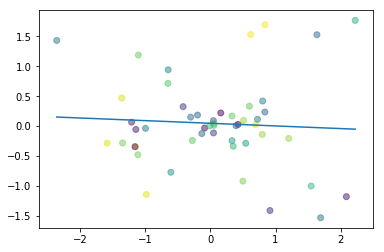

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(4)
n=50
x = np.random.randn(n)
y=x * np.random.randn(n)

colors = np.random.rand(n)
plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))

plt.scatter(x,y,c=colors,alpha = 0.5)
plt.show()

In [33]:
#building dataset
x_values = [i for i in range(11)]

In [34]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [35]:
x_train = np.array(x_values,dtype=np.float32)
x_train.shape

(11,)

In [36]:
x_train = x_train.reshape(-1,1)
x_train.shape

(11, 1)

In [37]:
y_values = [2*i+1 for i in x_values]

In [38]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [39]:
y_train = np.array(y_values,dtype=np.float32)
y_train = y_train.reshape(-1,1)

#### building model

In [40]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [41]:
#create class 
class LinearRegressionModel(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegressionModel, self).__init__()
        self.Linear = nn.Linear(input_dim,output_dim)
    
    def forward(self,x):
        out = self.Linear(x)
        return out
                 
    
    

In [42]:
input_dim = 1
output_dim =1 
model = LinearRegressionModel(input_dim,output_dim)

In [43]:
print(torch.__version__)


0.4.1


In [44]:
criterion = nn.MSELoss()

In [45]:
learning_rate=0.01
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [46]:
epochs = 100

In [48]:
for epoch in range(epochs):
    epoch += 1
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch,loss.data[0]))

epoch 1, loss 0.07714305073022842
epoch 2, loss 0.07628154754638672
epoch 3, loss 0.07542985677719116
epoch 4, loss 0.07458741217851639
epoch 5, loss 0.07375457882881165
epoch 6, loss 0.0729309692978859
epoch 7, loss 0.07211652398109436
epoch 8, loss 0.07131119817495346
epoch 9, loss 0.07051488757133484
epoch 10, loss 0.06972737610340118
epoch 11, loss 0.06894883513450623
epoch 12, loss 0.06817881017923355
epoch 13, loss 0.06741750240325928
epoch 14, loss 0.06666470319032669
epoch 15, loss 0.06592027842998505
epoch 16, loss 0.06518413871526718
epoch 17, loss 0.06445623934268951
epoch 18, loss 0.0637364387512207
epoch 19, loss 0.06302481144666672
epoch 20, loss 0.062320929020643234
epoch 21, loss 0.06162502244114876
epoch 22, loss 0.0609368272125721
epoch 23, loss 0.06025638058781624
epoch 24, loss 0.05958353728055954
epoch 25, loss 0.05891811102628708
epoch 26, loss 0.058260224759578705
epoch 27, loss 0.057609673589468
epoch 28, loss 0.056966349482536316
epoch 29, loss 0.05633014813065

D:\anaconda\envs\gpuENV\lib\site-packages\ipykernel_launcher.py:11: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  # This is added back by InteractiveShellApp.init_path()


In [49]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ 0.7036548],
       [ 2.7463312],
       [ 4.7890077],
       [ 6.831684 ],
       [ 8.874361 ],
       [10.917038 ],
       [12.959714 ],
       [15.00239  ],
       [17.045067 ],
       [19.087744 ],
       [21.13042  ]], dtype=float32)

In [50]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

save model

In [51]:
save_model = False
if save_model is True:
    torch.save(model.state_dict(),'awesome.pkl')
    

load model

In [52]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome.pkl'))

# linear regression model with gpu

In [53]:
import torch
import torch.nn as nn
from torch.autograd import Variable

#create class 
class LinearRegressionModel(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegressionModel, self).__init__()
        self.Linear = nn.Linear(input_dim,output_dim)
    
    def forward(self,x):
        out = self.Linear(x)
        return out

input_dim = 1
output_dim =1 
model = LinearRegressionModel(input_dim,output_dim)

if torch.cuda.is_available():
    model.cuda()

criterion = nn.MSELoss()


learning_rate=0.01
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

epochs = 100
for epoch in range(epochs):
    epoch += 1
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch,loss.data[0]))


epoch 1, loss 85.0634536743164
epoch 2, loss 7.472680568695068
epoch 3, loss 1.1378769874572754
epoch 4, loss 0.6152673363685608
epoch 5, loss 0.5668055415153503
epoch 6, loss 0.5570837259292603
epoch 7, loss 0.5505861043930054
epoch 8, loss 0.5444150567054749
epoch 9, loss 0.5383338332176208
epoch 10, loss 0.532322347164154
epoch 11, loss 0.5263777375221252
epoch 12, loss 0.5204998850822449
epoch 13, loss 0.5146875977516174
epoch 14, loss 0.5089401006698608
epoch 15, loss 0.5032569169998169
epoch 16, loss 0.497637003660202
epoch 17, loss 0.4920801818370819
epoch 18, loss 0.48658502101898193
epoch 19, loss 0.4811514914035797
epoch 20, loss 0.47577860951423645
epoch 21, loss 0.4704655408859253
epoch 22, loss 0.4652118682861328
epoch 23, loss 0.46001699566841125
epoch 24, loss 0.4548800587654114
epoch 25, loss 0.44980061054229736
epoch 26, loss 0.44477778673171997
epoch 27, loss 0.43981078267097473
epoch 28, loss 0.43489959836006165
epoch 29, loss 0.43004322052001953
epoch 30, loss 0.425

D:\anaconda\envs\gpuENV\lib\site-packages\ipykernel_launcher.py:40: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
